<a href="https://colab.research.google.com/github/IrfanKhalid/ForexExchangePrediction/blob/master/ForexExchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import os
#import plotly as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls drive/'My Drive'

'ACL txt.zip'				   'Lucene-Tutorial (1).gdoc'
'Assignment 1.pdf'			    Lucene-Tutorial.gdoc
 Classroom				   'MarksSheet - Data Science (1).xlsx'
'Colab Notebooks'			   'MarksSheet - Data Science.xlsx'
 f04reqprobs.pdf			    MSDS.pdf
'Forex_AUDUSD1440 - Forex_AUDUSD1440.csv'   SData.csv


In [0]:
Forex=pd.read_csv("drive/My Drive/Forex_AUDUSD1440 - Forex_AUDUSD1440.csv")

In [8]:
Forex.head()

,Time,Open,High,Low,Close,Volume,currentopen,currentclose(predict)
0,2012.12.10,1.04865,1.05049,1.04643,1.04868,59083,1.04870,1.05266
1,2012.12.11,1.04870,1.05315,1.04602,1.05266,61555,1.05265,1.05531
2,2012.12.12,1.05265,1.05848,1.05219,1.05531,68021,1.05522,1.05264
3,2012.12.13,1.05522,1.05628,1.05072,1.05264,66515,1.05261,1.05651
4,2012.12.14,1.05261,1.05770,1.05090,1.05651,68063,1.05507,1.05499


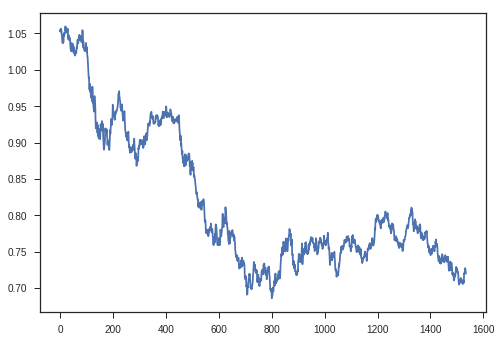

In [9]:
plt.plot(Forex['currentclose(predict)'])

In [0]:
Forex.shape
Forex.describe()

,open,high,low,close,volume,currentopen,currentclose(predict)
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1.429936,1.436889,1.423761,1.430035,93945.778212,1.430057,1.430158
std,0.110089,0.110802,0.109472,0.110087,30527.663694,0.110108,0.110099
min,1.162730,1.168950,1.160340,1.161480,15163.000000,1.162730,1.161480
25%,1.353195,1.360275,1.347660,1.353795,72793.000000,1.353445,1.354170
50%,1.446390,1.453560,1.440210,1.447330,93096.000000,1.447260,1.447360
75%,1.509450,1.517665,1.502610,1.509550,110574.000000,1.509645,1.509745
max,1.631960,1.659080,1.627990,1.633450,292619.000000,1.631960,1.633450


In [10]:
#train['Age'].apply(lambda x: meanMaleAge if x=0  )
#Forex.drop(['Predict'],axis=1)
Forex['Prdeict']=Forex['currentclose(predict)']-Forex['currentopen']
Forex['Prdeict']=Forex['Prdeict'].apply(lambda x: 1 if x > 0 else 0)
Forex.head()


,Time,Open,High,Low,Close,Volume,currentopen,currentclose(predict),Prdeict
0,2012.12.10,1.04865,1.05049,1.04643,1.04868,59083,1.04870,1.05266,1
1,2012.12.11,1.04870,1.05315,1.04602,1.05266,61555,1.05265,1.05531,1
2,2012.12.12,1.05265,1.05848,1.05219,1.05531,68021,1.05522,1.05264,0
3,2012.12.13,1.05522,1.05628,1.05072,1.05264,66515,1.05261,1.05651,1
4,2012.12.14,1.05261,1.05770,1.05090,1.05651,68063,1.05507,1.05499,0


In [0]:


Forex=Forex.drop(['opena1','opena2','opena3'], axis=1)

ValueError: ignored

In [13]:
Forex.Open=(Forex.Open*100000).astype(int)
Forex.Close=(Forex.Close*100000).astype(int)
Forex.High=(Forex.High*100000).astype(int)
Forex.Low=(Forex.Low*100000).astype(int)
Forex.currentopen=(Forex.currentopen*100000).astype(int)
Forex['currentclose(predict)']=(Forex['currentclose(predict)'] *100000).astype(int)

Forex.head()

,Time,Open,High,Low,Close,Volume,currentopen,currentclose(predict),Prdeict
0,2012.12.10,104865,105048,104643,104867,59083,104870,105266,1
1,2012.12.11,104870,105315,104602,105266,61555,105265,105531,1
2,2012.12.12,105265,105847,105219,105531,68021,105522,105264,0
3,2012.12.13,105522,105627,105072,105264,66515,105261,105651,1
4,2012.12.14,105261,105770,105090,105651,68063,105507,105498,0


In [0]:

plt.plot(Forex.High)


In [0]:
TrainData = train.drop(['Survived', 'PassengerId','Cabin','Fare','Name','Age','Ticket'], axis=1)
SurvivedLabel = train["Survived"]
X_train, X_test,Y_train, Y_test = train_test_split(TrainData, SurvivedLabel, test_size = 0.20, random_state = 0)
print (train.shape , X_train.shape , X_test.shape , Y_train.shape , Y_test.shape )




In [16]:
ForexTrain=Forex[['Open','High','Close','Low',  'currentopen', 'Volume']] #,
ForexTest=Forex['Prdeict']
X_train, X_test,Y_train, Y_test = train_test_split(ForexTrain, ForexTest, test_size = 0.15, random_state = 0)
print (ForexTrain.shape , X_train.shape , X_test.shape , Y_train.shape , Y_test.shape )

(1535, 6) (1304, 6) (231, 6) (1304,) (231,)


In [17]:
Y_train.head()

107    0
443    1
674    1
148    1
435    1
Name: Prdeict, dtype: int64

In [0]:
X_test.head()

,open,high,close,low,volume
1145,1.44744,1.47107,1.46122,1.44680,142821
386,1.23647,1.24154,1.23835,1.23252,83557
1451,1.44881,1.45362,1.44840,1.44435,83312
721,1.43804,1.43819,1.42879,1.42709,45468
1476,1.48468,1.50882,1.50298,1.48433,92732


In [18]:
Model = RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=10,max_leaf_nodes =80,min_samples_split=2)
Model.fit( X_train , Y_train )


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=80,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
YPredict=Model.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, YPredict))
print(rms)
print (Model.score( X_train , Y_train ) , Model.score( X_test , Y_test ))

0.6963106238227914
0.8765337423312883 0.5151515151515151


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


DecisionTree = RandomForestClassifier(random_state=0)
DecisionTree.fit(X=X_train, y=Y_train)


DecisionTree.score(X=X_test, y=Y_test)

TypeError: ignored

In [0]:
#model = svm.SVC(gamma='scale', decision_function_shape='ovo')
#model.fit( X_train , Y_train )

In [28]:
#print (model.score( X_train , Y_train ) , model.score( X_test , Y_test ))
print (Model.score( X_train , Y_train ) , Model.score( X_test , Y_test ))


0.8737785016286646 0.4884004884004884
